Training a Sentiment Classifier

In [13]:
#setup
import random
import tqdm

In [14]:
def extract_features(x: str) -> dict[str, float]:
    features = {}
    x_split = x.split(' ')
    for x in x_split:
        features[x] = features.get(x, 0) + 1.0
    return features

In [15]:
feature_weights = {}

In [16]:
#data reading
def read_xy_data(filename: str) -> tuple[list[str], list[int]]:
    x_data = []
    y_data = []
    with open(filename, 'r') as f:
        for line in f:
            label, text = line.strip().split(" ||| ")
            x_data.append(text)
            y_data.append(int(label))
    return x_data, y_data

In [17]:
x_train, y_train = read_xy_data('./data/train.txt')
x_dev, y_dev = read_xy_data('./data/dev.txt')

In [18]:
print(x_train[0])
print(x_dev[0])

The Rock is destined to be the 21st Century 's new `` Conan '' and that he 's going to make a splash even greater than Arnold Schwarzenegger , Jean-Claud Van Damme or Steven Segal .
It 's a lovely film with lovely performances by Buy and Accorsi .


In [19]:
def run_classifier(features: dict[str, float]) -> int:
    score = 0
    for feat_name, feat_value in features.items():
        score = score + feat_value * feature_weights.get(feat_name, 0)
    if score > 0:
        return 1
    elif score < 0:
        return -1
    else:
        return 0

In [20]:
#inference Code 
#how we run the classifier

NUM_EPOCHS = 2
for epoch in range(1, NUM_EPOCHS+1):
    # Shuffle the order of the data
    data_ids = list(range(len(x_train)))
    random.shuffle(data_ids)
    # Run over all data points
    for data_id in tqdm.tqdm(data_ids, desc=f'Epoch {epoch}'):
        x = x_train[data_id]
        y = y_train[data_id]
        # We will skip neutral examples
        if y == 0:    
            continue
        # Make a prediction
        features = extract_features(x)
        predicted_y = run_classifier(features)
        # Update the weights if the prediction is wrong
        if predicted_y != y:
            for feature in features:
                feature_weights[feature] = feature_weights.get(feature, 0) + y * features[feature]


Epoch 1:   0%|          | 0/8544 [00:00<?, ?it/s]

Epoch 2: 100%|██████████| 8544/8544 [00:00<00:00, 87962.59it/s]


In [21]:
#Evalauation code
def calculate_accuracy(x_data: list[str], y_data: list[int]) -> float:
    total_number = 0
    correct_number = 0
    for x,y in zip(x_data, y_data):
        y_pred = run_classifier(extract_features(x))
        total_number += 1
        if y == y_pred:
            correct_number += 1
    return correct_number/ float(total_number)

In [22]:
label_count = {}
for y in y_dev:
    if y not in label_count:
        label_count[y] = 
    label_count[y] +=1
print(label_count)

SyntaxError: invalid syntax (2898009674.py, line 4)

In [23]:
train_accuracy = calculate_accuracy(x_train, y_train)
test_accuracy = calculate_accuracy(x_dev,y_dev)
print(f"train accuracy {train_accuracy}")
print(f"dev/test accuracy {test_accuracy}")


train accuracy 0.6889044943820225
dev/test accuracy 0.5576748410535877


Error Analysis


In [24]:
def get_feature_contributions(features):
    output = {}
    for feat_name, feat_value in features.items():
        output[feat_name] = feat_value * feature_weights.get(feat_name, 0)
    return output

def find_errors(x_data, y_data):
    error_ids = []
    y_preds = []
    id2contributions = {}
    for i, (x, y) in enumerate(zip(x_data, y_data)):
        features = extract_features(x)
        y_preds.append(run_classifier(features))
        if y != y_preds[-1]:
            error_ids.append(i)
            id2contributions[i] = get_feature_contributions(features)
    for _ in range(5):
        my_id = random.choice(error_ids)
        x, y, y_pred = x_data[my_id], y_data[my_id], y_preds[my_id]

        print(f'{x}\ntrue label: {y}\npredicted label: {y_pred}')
        contributions = sorted(id2contributions[my_id].items(), key=lambda x: -x[1])
        for feat_name, contribution in contributions:
            print(f'Feature: {feat_name} ({contribution})')
        
        print()

In [25]:
find_errors(x_dev, y_dev)

Aside from minor tinkering , this is the same movie you probably loved in 1994 , except that it looks even better .
true label: 1
predicted label: -1
Feature: , (6.0)
Feature: from (3.0)
Feature: minor (3.0)
Feature: you (3.0)
Feature: loved (2.0)
Feature: it (2.0)
Feature: movie (1.0)
Feature: in (1.0)
Feature: that (1.0)
Feature: tinkering (0.0)
Feature: this (0.0)
Feature: the (0.0)
Feature: 1994 (0.0)
Feature: better (0.0)
Feature: Aside (-1.0)
Feature: looks (-1.0)
Feature: even (-2.0)
Feature: . (-2.0)
Feature: is (-3.0)
Feature: same (-5.0)
Feature: except (-5.0)
Feature: probably (-6.0)

I 'm sure if you 're a Hartley fan , you might enjoy yourself ... Me , I did n't care for it .
true label: 0
predicted label: -1
Feature: you (6.0)
Feature: , (6.0)
Feature: fan (3.0)
Feature: enjoy (3.0)
Feature: it (2.0)
Feature: a (1.0)
Feature: did (1.0)
Feature: care (1.0)
Feature: for (1.0)
Feature: sure (0.0)
Feature: if (0.0)
Feature: Me (0.0)
Feature: might (-1.0)
Feature: 're (-2.0)
F

In [26]:
import random
k = 25
topk_features = sorted(feature_weights.items(), key=lambda x: -x[1])[:k]
bottomk_features = sorted(feature_weights.items(), key=lambda x: x[1])[:k]
randomk_features = random.sample(list(feature_weights.items()), k)

print("Top-k")
for feature in topk_features:
    print(feature)

print("\nBottom-k")
for feature in bottomk_features:
    print(feature)

print("\nRandom k")
for feature in randomk_features:
    print(feature)


Top-k
('solid', 11.0)
('best', 10.0)
('appealing', 9.0)
('powerful', 9.0)
('works', 9.0)
('treat', 9.0)
('rare', 8.0)
('provides', 8.0)
('cinema', 8.0)
('terrific', 8.0)
('refreshing', 8.0)
('part', 8.0)
('culture', 7.0)
('honest', 7.0)
('wo', 7.0)
('stand', 7.0)
('fun', 7.0)
('enjoyable', 7.0)
('engrossing', 7.0)
('good', 7.0)
('manages', 7.0)
('love', 7.0)
('deeply', 7.0)
('sweet', 7.0)
('hilarious', 7.0)

Bottom-k
('worst', -16.0)
('stupid', -13.0)
('bad', -11.0)
('another', -10.0)
('pretentious', -10.0)
('dull', -9.0)
('no', -9.0)
('ultimately', -9.0)
('barely', -9.0)
('idea', -9.0)
('flat', -9.0)
('mess', -9.0)
('left', -8.0)
('were', -8.0)
('scene', -8.0)
('becomes', -8.0)
('tedious', -8.0)
('jokes', -8.0)
('lacking', -8.0)
('offensive', -8.0)
('none', -7.0)
('thinks', -7.0)
('Lawrence', -7.0)
('instead', -7.0)
('terrible', -7.0)

Random k
('servants', 2.0)
('grossly', -1.0)
('control', 0.0)
('brilliantly', 1.0)
('black-and-white', 2.0)
('nowadays', 1.0)
('51', -2.0)
('melodrama'

Dev Label Counts: {1: 444, 0: 229, -1: 428}
Train Label Counts: {1: 3610, 0: 1624, -1: 3310}


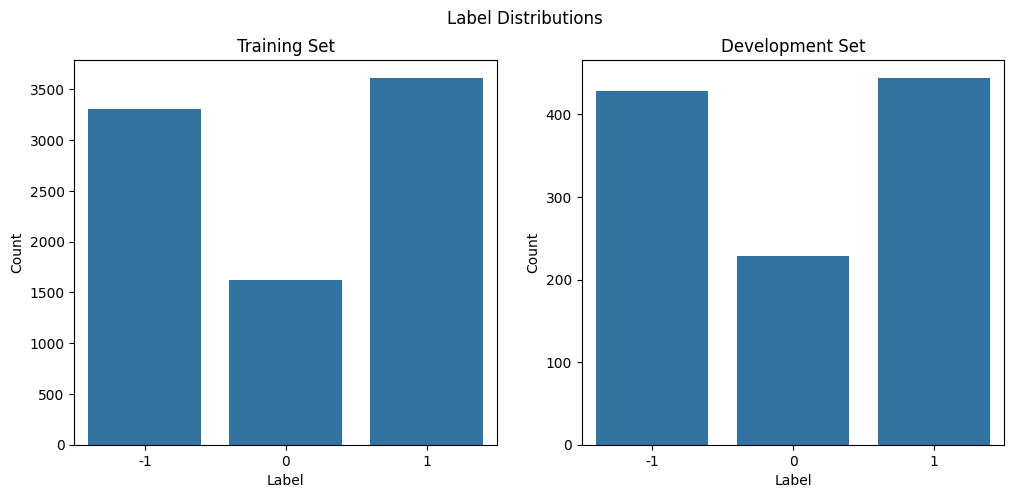

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Fix for the code in cell [22] ---
# Count labels in the dev set
dev_label_count = {}
for y in y_dev:
    dev_label_count[y] = dev_label_count.get(y, 0) + 1
print(f"Dev Label Counts: {dev_label_count}")

# Count labels in the train set
train_label_count = {}
for y in y_train:
    train_label_count[y] = train_label_count.get(y, 0) + 1
print(f"Train Label Counts: {train_label_count}")

# --- Visualization Code ---
# Plotting the distributions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Label Distributions')

# Training set distribution
sns.barplot(x=list(train_label_count.keys()), y=list(train_label_count.values()), ax=ax1)
ax1.set_title('Training Set')
ax1.set_xlabel('Label')
ax1.set_ylabel('Count')

# Development set distribution
sns.barplot(x=list(dev_label_count.keys()), y=list(dev_label_count.values()), ax=ax2)
ax2.set_title('Development Set')
ax2.set_xlabel('Label')
ax2.set_ylabel('Count')

plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_29700\2058929283.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_weights, y=top_words, ax=ax1, palette='Greens_d')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_29700\2058929283.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_weights, y=bottom_words, ax=ax2, palette='Reds_d')


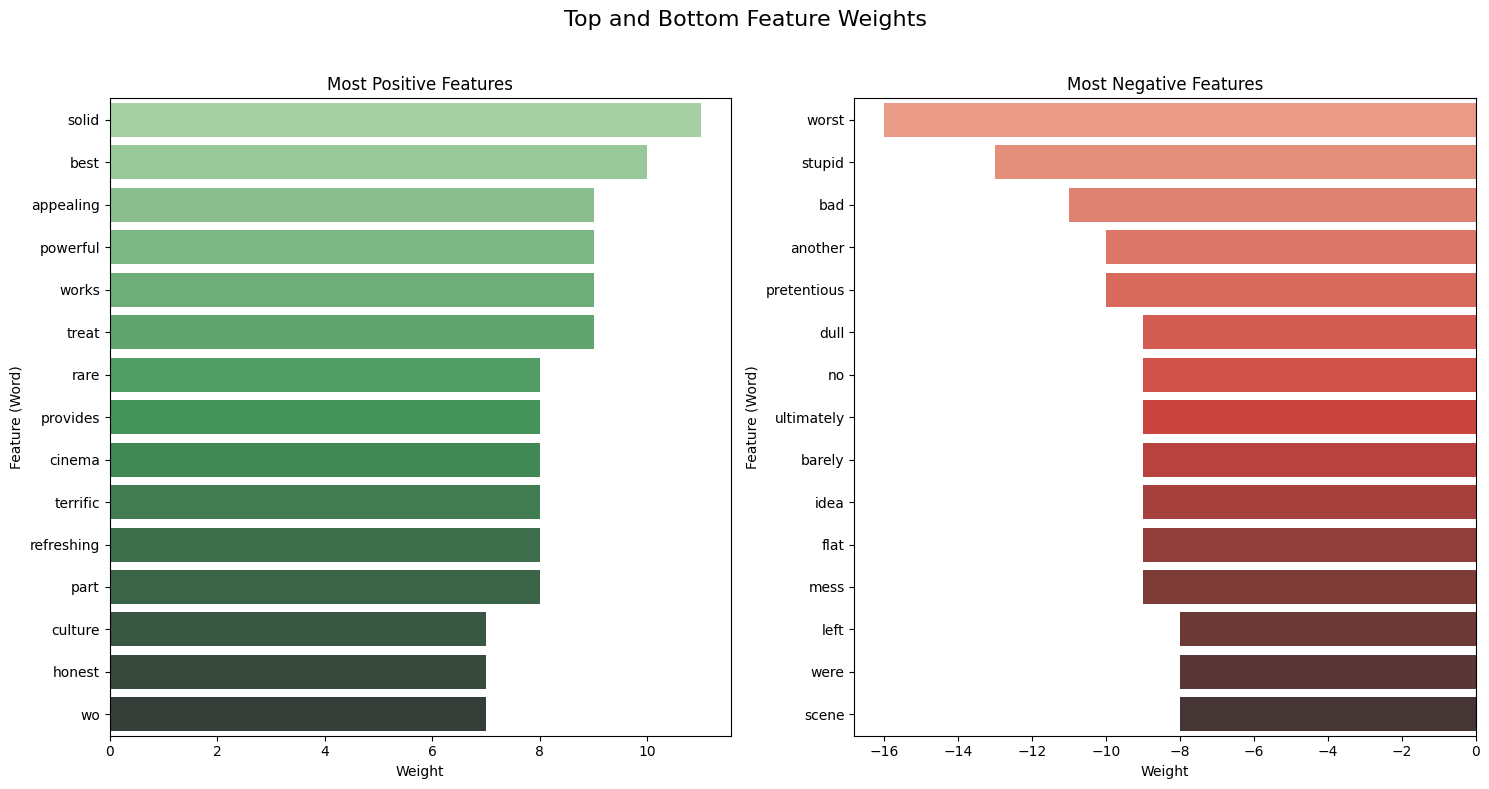

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import random

k = 15
topk_features = sorted(feature_weights.items(), key=lambda x: -x[1])[:k]
bottomk_features = sorted(feature_weights.items(), key=lambda x: x[1])[:k]

# Separate feature names and their weights
top_words = [feature[0] for feature in topk_features]
top_weights = [feature[1] for feature in topk_features]

bottom_words = [feature[0] for feature in bottomk_features]
bottom_weights = [feature[1] for feature in bottomk_features]

# --- Visualization Code ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
fig.suptitle('Top and Bottom Feature Weights', fontsize=16)

# Top k features
sns.barplot(x=top_weights, y=top_words, ax=ax1, palette='Greens_d')
ax1.set_title('Most Positive Features')
ax1.set_xlabel('Weight')
ax1.set_ylabel('Feature (Word)')

# Bottom k features
sns.barplot(x=bottom_weights, y=bottom_words, ax=ax2, palette='Reds_d')
ax2.set_title('Most Negative Features')
ax2.set_xlabel('Weight')
ax2.set_ylabel('Feature (Word)')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

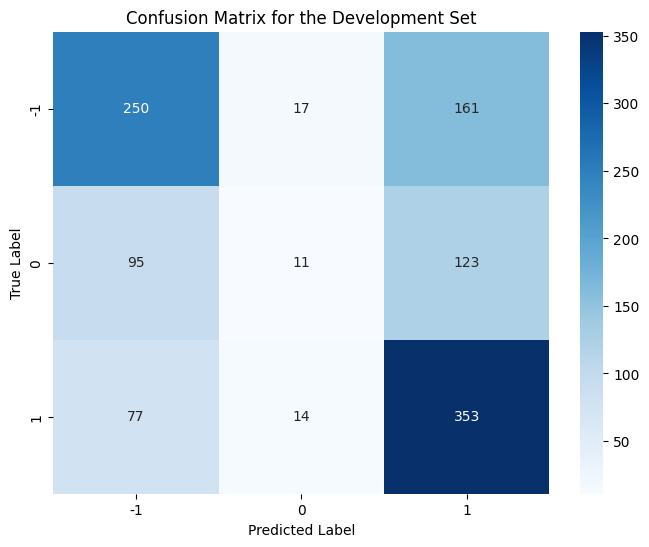

In [30]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions for the dev set
y_preds_dev = [run_classifier(extract_features(x)) for x in x_dev]

# --- Visualization Code ---
# Calculate the confusion matrix
cm = confusion_matrix(y_dev, y_preds_dev, labels=[-1, 0, 1])

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[-1, 0, 1], yticklabels=[-1, 0, 1])
plt.title('Confusion Matrix for the Development Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Text: "Collateral Damage finally delivers the goods for Schwarzenegger fans ."
True Label: 1, Predicted Label: -1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_29700\2208483008.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=scores, y=words, palette=colors)


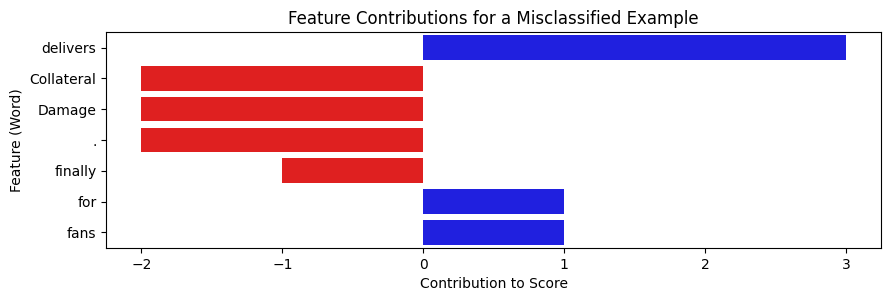

In [31]:
import random
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_single_error(x_data, y_data):
    # Find a misclassified example
    error_ids = []
    y_preds = []
    for i, (x, y) in enumerate(zip(x_data, y_data)):
        y_pred = run_classifier(extract_features(x))
        y_preds.append(y_pred)
        if y != y_pred:
            error_ids.append(i)

    # Pick one error to analyze
    my_id = random.choice(error_ids)
    x, y_true, y_pred = x_data[my_id], y_data[my_id], y_preds[my_id]

    print(f'Text: "{x}"')
    print(f'True Label: {y_true}, Predicted Label: {y_pred}')

    # Get feature contributions
    features = extract_features(x)
    contributions = get_feature_contributions(features)
    
    # Filter out zero-contribution features to make the plot cleaner
    contributions = {k: v for k, v in contributions.items() if v != 0}

    # Sort by absolute value for better visualization
    sorted_contributions = sorted(contributions.items(), key=lambda item: abs(item[1]), reverse=True)
    
    words = [item[0] for item in sorted_contributions]
    scores = [item[1] for item in sorted_contributions]

    # --- Visualization Code ---
    plt.figure(figsize=(10, len(words) * 0.4))
    colors = ['red' if s < 0 else 'blue' for s in scores]
    sns.barplot(x=scores, y=words, palette=colors)
    plt.title('Feature Contributions for a Misclassified Example')
    plt.xlabel('Contribution to Score')
    plt.ylabel('Feature (Word)')
    plt.show()

# Run the visualization for an error in the dev set
visualize_single_error(x_dev, y_dev)